# 作業目標:
    了解 Padding 的作法
    
    了解 Pooling 的作法

# 作業重點:
    (1) 調整Padding 的設定, 看 Pad 後的結果
    
    (2) 調整Pooling 的設定, 看 Poolin 後的結果

In [2]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

# 繪圖結果直接顯示在Jupyter cell 之內
%matplotlib inline  
plt.rcParams['figure.figsize'] = (5.0, 4.0) #  設定繪圖板的大小
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# autoreload。可以讓我們不退出IPython就動態修改代碼，在執行代碼前IPython會幫我們自動重載改動的模塊
%load_ext autoreload
%autoreload 2
np.random.seed(1)

In [3]:
# GRADED FUNCTION: zero_pad
def zero_pad(X, pad):
    """
    對image X 做 zero-padding. 
    參數定義如下:
    X -- python numpy array, 呈現維度 (m, n_H, n_W, n_C), 代表一批 m 個圖像
         n_H: 圖高, n_W: 圖寬, n_C: color channels 數
    pad -- 整數, 加幾圈的 zero padding.
    Returns:
    X_pad -- image of shape (m, n_H + 2*pad, n_W + 2*pad, n_C) 做完zero-padding 的結果
    """
    
    X_pad = np.pad(X, ((0, 0), (pad, pad), (pad, pad), (0, 0)), 'constant', constant_values=(0, 0))
  
    return X_pad

x.shape = (4, 28, 28, 3)
x_pad.shape = (4, 30, 30, 3)
x[1,1] = [[-0.70361498 -0.79314532  0.77133529]
 [ 0.98363864  1.39727326 -0.29513533]
 [-2.5822348   0.52339028  0.7599321 ]
 [-1.46682315  0.09038025  0.27530828]
 [ 0.34035496 -0.46469447  0.08343319]
 [ 0.6003945  -1.77617344  0.91108243]
 [-0.36583665  0.76450212 -0.70262028]
 [-1.71176487  1.18113873  1.64113619]
 [-1.86053074 -1.29227662  0.09417316]
 [-1.04936032  0.76025175 -0.7970639 ]
 [-0.51758053  0.21143497 -2.1782251 ]
 [-0.31992259  2.01464887  0.58688475]
 [-0.99910951  1.04601512  2.06318544]
 [ 1.27466848 -0.58461084 -0.65759614]
 [-0.37047685 -1.04905337  0.02921579]
 [-1.00568932 -0.87523939  0.32081877]
 [-0.56362206 -0.20438481  2.14817824]
 [ 0.36821949  1.19032323  0.43791813]
 [ 0.60297902 -1.34917521 -0.54697191]
 [-0.26225387 -0.44662665 -0.2029085 ]
 [ 0.15990174 -0.22261241  0.68959282]
 [-0.24779751  1.08395198 -0.01309541]
 [-0.59467626 -1.25139076 -0.76938362]
 [-0.25431072  1.20205935 -1.27187358]
 

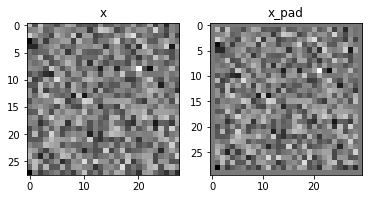

In [9]:
'''
作業修改
'''
np.random.seed(1)
x = np.random.randn(4,28,28,3) 
x_pad = zero_pad(x, 1)

print ("x.shape =", x.shape)
print ("x_pad.shape =", x_pad.shape)
print ("x[1,1] =", x[1,1])
print ("x_pad[1,1] =", x_pad[1,1])
fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x[0,:,:,0])
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0,:,:,0])

In [11]:
# GRADED FUNCTION: pool_forward
def pool_forward(A_prev, hparameters, mode = "max"):
    """
    設計一個前行網路的池化層
    參數定義如下:
    A_prev -- 輸入的numpy 陣列, 維度 (m, n_H_prev, n_W_prev, n_C_prev)
    hparameter 超參數 --  "f" and "stride" 所形成的python 字典
    mode -- 池化的模式: "max" or "average"
    
    返回:
        A -- 輸出的池化層, 維度為 (m, n_H, n_W, n_C) 的 numpy 陣列
        cache -- 可以應用在 backward pass pooling layer 資料, 包含 input and hparameter
    """

    # 檢索尺寸 from the input shape
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
 
    # 檢索超參數 from "hparameters"
    f = hparameters["f"]
    stride = hparameters["stride"]

    # 定義輸出的dimensions
    n_H = int(1 + (n_H_prev - f) / stride)
    n_W = int(1 + (n_W_prev - f) / stride)
    n_C = n_C_prev

    # 初始化輸出的 matrix A
    A = np.zeros((m, n_H, n_W, n_C))

    ### 程式起始位置  ###
    for i in range(m): # 訓練樣本的for 迴圈
        for h in range(n_H): # 輸出樣本的for 迴圈, 針對vertical axis
            for w in range(n_W): #  輸出樣本的for 迴圈, 針對 horizontal axis
                for c in range (n_C): #  輸出樣本的for 迴圈, 針對channels

                     # 找出特徵圖的寬度跟高度四個點
                    vert_start = h * stride
                    vert_end = h * stride+ f
                    horiz_start = w * stride
                    horiz_end = w * stride + f

                    # 定義第i個訓練示例
                    a_prev_slice = A_prev[i, vert_start:vert_end, horiz_start:horiz_end,c]

                    # 計算輸入data 的池化結果. 使用 if statment 去做分類
                    if mode == "max":
                        A[i, h, w, c] = np.max(a_prev_slice)
                    elif mode == "average":
                        A[i, h, w, c] = np.mean(a_prev_slice)

    ### 程式結束  ###
    
    # 儲存輸入的特徵圖跟所設定的超參數, 可以用在 pool_backward()
    cache = (A_prev, hparameters)
    
    # 確認輸出的資料維度
    assert(A.shape == (m, n_H, n_W, n_C))
    
    return A, cache

In [12]:
'''
作業修改
'''
np.random.seed(1)
A_prev = np.random.randn(1,28,28,3)
hparameters = {"stride" : 1, "f": 3}

A, cache = pool_forward(A_prev, hparameters)
print("mode = max")
print("A =", A)
print()
A, cache = pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A =", A)

mode = max
A = [[[[2.19069973 2.52832571 1.33145711]
   [1.74481176 2.52832571 1.33145711]
   [1.74481176 1.46210794 1.33145711]
   ...
   [2.18697965 0.87616892 0.82797464]
   [0.61853913 0.87616892 1.81053491]
   [0.61853913 0.98633519 1.81053491]]

  [[2.19069973 2.52832571 1.33145711]
   [1.19891788 2.52832571 1.33145711]
   [1.19891788 1.20205486 1.33145711]
   ...
   [2.18697965 0.9561217  1.15528789]
   [1.19268607 1.12232832 1.81053491]
   [1.19268607 1.45142926 1.81053491]]

  [[2.19069973 2.52832571 1.33145711]
   [0.90148689 2.52832571 1.33145711]
   [0.4611641  1.20205486 1.33145711]
   ...
   [2.05635552 1.76024923 1.15528789]
   [2.05635552 1.76024923 1.81053491]
   [2.05635552 1.76024923 1.81053491]]

  ...

  [[1.61679423 0.6316571  1.76428506]
   [1.61679423 0.6316571  1.76428506]
   [0.7671131  0.80293667 1.76428506]
   ...
   [0.68140191 0.75825943 1.069501  ]
   [1.01699569 0.75825943 1.49699525]
   [2.11262212 0.75825943 1.49699525]]

  [[1.61679423 0.19038724 1.63